In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [6]:
# Load the CSV file
file_path = r"C:\Users\khush\.ipython\Project AIML\burger_sales_data_realistic_converted.csv"
df = pd.read_csv(file_path)

In [7]:
# Display basic information about the dataset
print(df.info())  # Check data types & missing values
print(df.head())  # Display first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Burger Name                 70 non-null     object 
 1   Year                        70 non-null     int64  
 2   Pieces Sold                 70 non-null     int64  
 3   Coca Cola Ordered           70 non-null     int64  
 4   Cost of Making (per piece)  70 non-null     float64
 5   Selling Price (per piece)   70 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.4+ KB
None
  Burger Name  Year  Pieces Sold  Coca Cola Ordered  \
0     Big Mac  2021        47860              30613   
1     Big Mac  2022        54390              30129   
2     Big Mac  2023        55226              33843   
3     Big Mac  2024        57191              34893   
4     Big Mac  2025        57772              33500   

   Cost of Making (per piece)  Selling Price

In [8]:
# Prepare the data for prediction
X = df[['Year']]  # Independent variable (Year)
y = df[['Pieces Sold']]  # Dependent variable (Sales)

In [9]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
# Predict sales for next year (assuming last year in dataset is 2024)
future_year = max(df['Year']) + 1
predicted_sales = model.predict([[future_year]])

C:\Users\khush\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
print(f"Predicted sales for {future_year}: {int(predicted_sales[0][0])}")

Predicted sales for 2028: 45595


In [12]:
# Calculate profit for each row
df['Profit'] = (df['Selling Price (per piece)'] - df['Cost of Making (per piece)']) * df['Pieces Sold']

In [13]:
#Display updated dataset with profit
print(df[['Burger Name', 'Year', 'Pieces Sold', 'Profit']].head())

  Burger Name  Year  Pieces Sold        Profit
0     Big Mac  2021        47860  1.675100e+06
1     Big Mac  2022        54390  1.960760e+06
2     Big Mac  2023        55226  2.050624e+06
3     Big Mac  2024        57191  2.187241e+06
4     Big Mac  2025        57772  2.275784e+06


In [14]:
# Calculate the percentage of Coke sales relative to burger sales
df['Coke Sales Percentage'] = (df['Coca Cola Ordered'] / df['Pieces Sold']) * 100

In [15]:
# Suggest combo if Coke sales are less than 60%
df['Combo Suggestion'] = df['Coke Sales Percentage'].apply(lambda x: 'Combo Offer' if x < 60 else 'No Offer')

In [16]:
# Display the results
print(df[['Burger Name', 'Year', 'Coke Sales Percentage', 'Combo Suggestion']].head())

  Burger Name  Year  Coke Sales Percentage Combo Suggestion
0     Big Mac  2021              63.963644         No Offer
1     Big Mac  2022              55.394374      Combo Offer
2     Big Mac  2023              61.280918         No Offer
3     Big Mac  2024              61.011348         No Offer
4     Big Mac  2025              57.986568      Combo Offer


In [17]:
# Save the updated dataframe to a new CSV file
output_file = "burger_sales_analysis.csv"
df.to_csv(output_file, index=False)

print(f"Processed data saved as {output_file}")

Processed data saved as burger_sales_analysis.csv


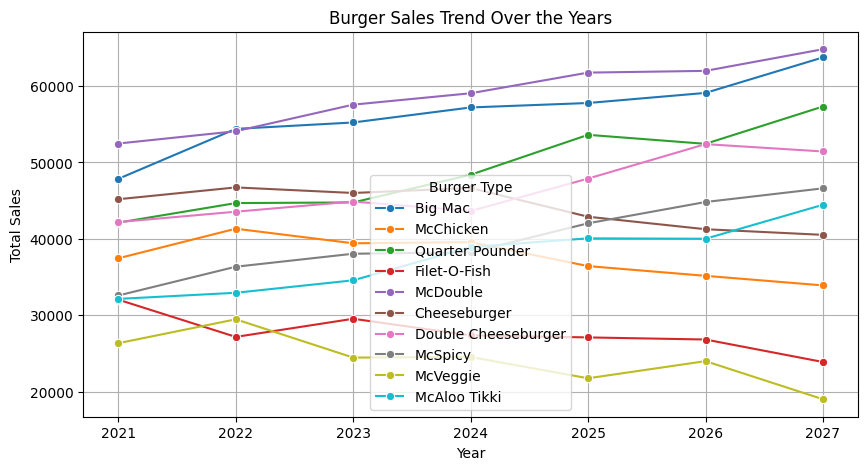

In [22]:
#Sales Trend Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year", y="Pieces Sold", hue="Burger Name", marker="o")
plt.title("Burger Sales Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Burger Type")
plt.grid(True)
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_16788\1820589441.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Burger Name", y="Profit", ci=None)


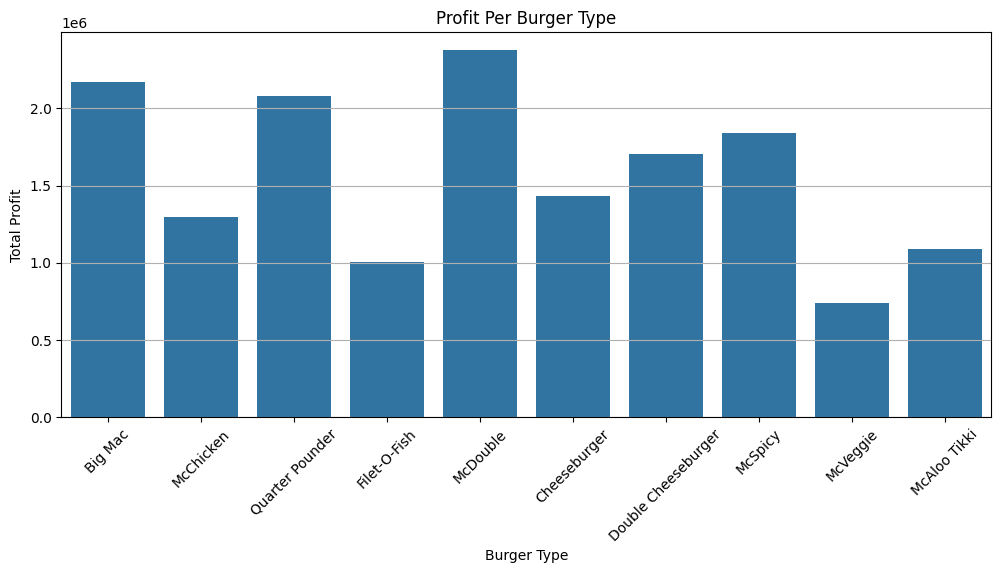

In [23]:
# Profit Analysis Per Burger
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Burger Name", y="Profit", ci=None)
plt.xticks(rotation=45)
plt.title("Profit Per Burger Type")
plt.xlabel("Burger Type")
plt.ylabel("Total Profit")
plt.grid(axis="y")
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_16788\2351297921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Combo Suggestion", palette="coolwarm")


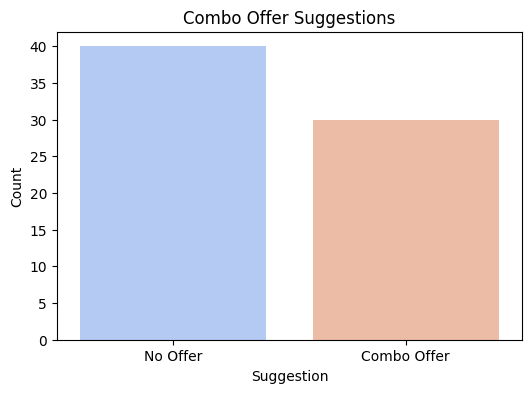

In [24]:
#Combo Offer Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Combo Suggestion", palette="coolwarm")
plt.title("Combo Offer Suggestions")
plt.xlabel("Suggestion")
plt.ylabel("Count")
plt.show()